In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline 
from sklearn.model_selection import train_test_split
import os

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Thesis_data.csv',header=0,encoding = 'unicode_escape')
df

,X,Y,Z,Step
0,9.375,3.0625,0.50,1
1,9.375,3.0625,0.51,1
2,9.375,3.0625,0.52,1
3,9.375,3.0625,0.53,1
4,9.375,3.0625,0.54,1
...,...,...,...,...
855,0.000,3.0625,1.89,13
856,0.000,3.0625,1.90,13
857,0.000,3.0625,1.91,13
858,0.000,3.0625,1.92,13


In [5]:
df.describe()

,X,Y,Z,Step
count,860.000000,860.000000,860.000000,860.000000
mean,5.587116,4.845605,1.197465,7.756977
std,3.719067,1.142329,0.522844,2.407837
min,0.000000,3.062500,0.000000,1.000000
25%,1.562500,3.062500,0.783800,7.000000
50%,7.770000,5.125000,1.220000,8.000000
75%,8.575000,5.845000,1.616975,9.000000
max,9.375000,5.845000,2.350000,13.000000


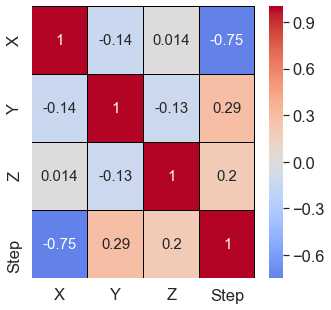

In [6]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

#Correlation Matrix Heatmap
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='coolwarm', annot=True, 
            linewidth = 0.3, linecolor='black',robust = True, annot_kws={"size": 15}, cbar=True, center= 0)

In [6]:
X = df.drop(columns=['Step'])
y = df.Step

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma = 'scale', C=10) 
clf.fit(X_train, y_train)
y_pred_SVM = clf.predict(X_test)
print(classification_report(y_test, y_pred_SVM))
score1 = f1_score(y_test, y_pred_SVM, average='weighted')
score1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.50      1.00      0.67         5
           3       0.00      0.00      0.00         7
           4       0.60      0.60      0.60         5
           5       0.60      1.00      0.75         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        79
           9       1.00      1.00      1.00        79
          10       0.64      1.00      0.78         9
          11       0.00      0.00      0.00        10
          12       0.58      1.00      0.74         7
          13       1.00      1.00      1.00         7

    accuracy                           0.93       258
   macro avg       0.69      0.82      0.73       258
weighted avg       0.89      0.93      0.90       258



0.9022663036087016

In [7]:
from sklearn.linear_model import LogisticRegression 
LogisticReg = LogisticRegression(multi_class = 'multinomial',solver = 'sag', C=10)
LogisticReg.fit(X_train, y_train)
y_pred_logReg = LogisticReg.predict(X_test)
print(classification_report(y_test, y_pred_logReg))
score2 = f1_score(y_test, y_pred_logReg, average='weighted')
score2

              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.38      0.60      0.46         5
           3       1.00      0.14      0.25         7
           4       0.80      0.80      0.80         5
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        79
           9       1.00      1.00      1.00        79
          10       0.75      1.00      0.86         9
          11       1.00      0.50      0.67        10
          12       0.75      0.86      0.80         7
          13       0.88      1.00      0.93         7

    accuracy                           0.94       258
   macro avg       0.85      0.84      0.80       258
weighted avg       0.96      0.94      0.94       258



0.935310361473152

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth=4, random_state = 42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
score3 = f1_score(y_test, y_pred_rfc, average='weighted')
score3

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.50      0.80      0.62         5
           3       0.00      0.00      0.00         7
           4       0.62      1.00      0.77         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        79
           9       1.00      1.00      1.00        79
          10       1.00      0.78      0.88         9
          11       0.83      1.00      0.91        10
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7

    accuracy                           0.96       258
   macro avg       0.83      0.89      0.85       258
weighted avg       0.95      0.96      0.95       258



0.9512962812381417

In [9]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))
score4 = f1_score(y_test, y_pred_dtc, average='weighted')
score4

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.44      1.00      0.61         7
           4       0.33      1.00      0.50         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        38
           8       1.00      1.00      1.00        79
           9       1.00      1.00      1.00        79
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        10
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7

    accuracy                           0.93       258
   macro avg       0.75      0.85      0.78       258
weighted avg       0.90      0.93      0.91       258



0.9060498820357262

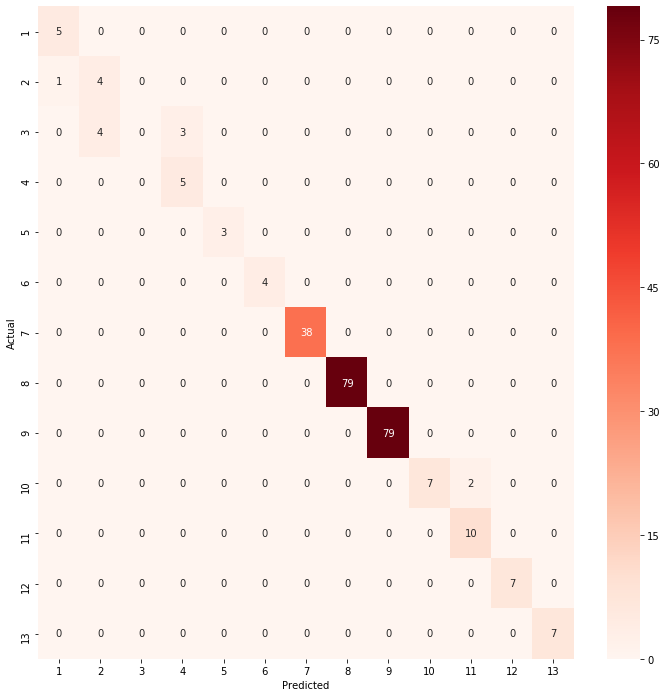

In [10]:
conf_mat3 = confusion_matrix(y_test, y_pred_rfc)

fig, ax3 = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat3, annot=True, fmt='d',
            xticklabels=np.unique(df.Step), yticklabels=np.unique(df.Step), cmap = 'Reds',linecolor='black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [24]:
f1_score_array = [score1, score2, score3, score4] #score1-SVM, score2-Logistic regression, score3-Random Forests, score4-Decision Tree
Max_f1_score= max(f1_score_array)
Max_f1_score

0.9512962812381417

In [23]:
from sklearn.externals import joblib
joblib.dump(rfc, 'Classifier.joblib')

# Load the model trained previously
rfc_1 = joblib.load('Classifier.joblib')

step_to_classify= [[9.375,3.0625,1.51],[6.995,5.125,0.3875],[0,3.0625,1.93],[9.4,3,1.8],[9.4,3,1.3]]

steps_to_classify = [step_to_classify]
predicted_step_values = rfc_1.predict(step_to_classify)
for predicted_value in predicted_step_values:
    print("These Co-Ordinates are in step:",predicted_value)


These Co-Ordinates are in step: 5
These Co-Ordinates are in step: 8
These Co-Ordinates are in step: 13
These Co-Ordinates are in step: 6
These Co-Ordinates are in step: 4
